In [1]:
# Import libraries
import numpy as np
from keras.models import Sequential
import os
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD
from PIL import Image
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

In [2]:
# set directory for train and validate data
train_ds = 'C:\\Users\\d7o0o\\Desktop\\Saturn\\New folder (2)\\images\\train\\'
val_ds = 'C:\\Users\\d7o0o\\Desktop\\Saturn\\New folder (2)\\images\\validate\\'

In [3]:
#Rescalling the images
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches using train_datagen
train_generator = train_datagen.flow_from_directory(
        train_ds,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary',
        shuffle=True)

# Flow test images in batches using train_datagen
val_generator = val_datagen.flow_from_directory(
        val_ds,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary',
        shuffle=True)

Found 104 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [4]:
train_generator.class_indices

{'glasses': 0, 'noglasses': 1}

In [5]:
# Add custom layers
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [6]:
# Model compilation
cnn_model.compile(loss='binary_crossentropy',
              optimizer=SGD(learning_rate=0.002, momentum=0.8),
              metrics=['accuracy'])

In [7]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 175232)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    11,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,215,873 (42.79 MB)

 Trainable params: 11,215,873 (42.79 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = cnn_model.fit(
    train_generator,
   # steps_per_epoch=10,
    epochs=10,
    validation_data=val_generator,
   # validation_steps=10
)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 459ms/step - accuracy: 0.5408 - loss: 0.6877 - val_accuracy: 0.5000 - val_loss: 0.7841
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 282ms/step - accuracy: 0.6560 - loss: 0.5502 - val_accuracy: 0.7750 - val_loss: 0.5081
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 279ms/step - accuracy: 0.8006 - loss: 0.4252 - val_accuracy: 0.5000 - val_loss: 1.0539
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 298ms/step - accuracy: 0.7503 - loss: 0.4410 - val_accuracy: 0.5750 - val_loss: 1.0146
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 289ms/step - accuracy: 0.9178 - loss: 0.2580 - val_accuracy: 0.5750 - val_loss: 1.1753
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 297ms/step - accuracy: 0.8586 - loss: 0.3017 - val_accuracy: 0.5750 - val_loss: 0.8073
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 363ms/step - accuracy: 0.8851 - loss: 0.2466 - val_accuracy: 0.7250 - val_loss: 0.6348
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 370ms/step - accuracy: 0.8333 - loss: 0.4465 - val_accuracy: 0.6500 - val_loss:

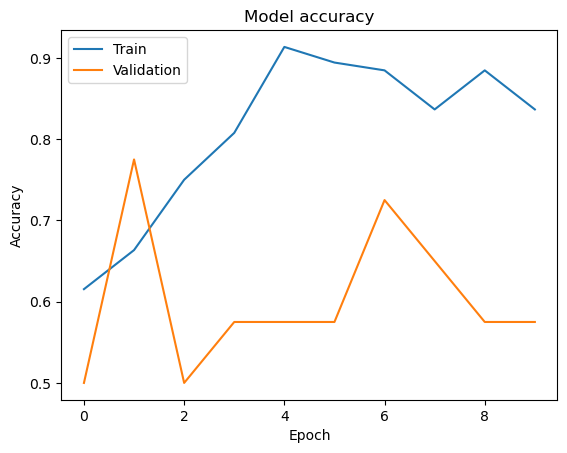

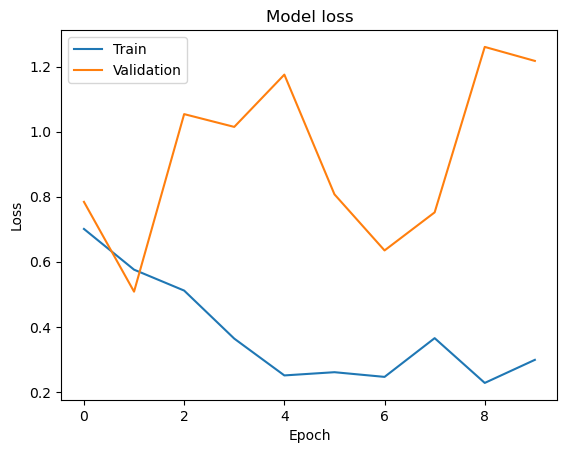

In [9]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [10]:
# Data generator with augmentations for the training set
train_datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data generator for the test set (without augmentations)
val_datagen = ImageDataGenerator()

# Create augmented training and regular test generators
train_generator = train_datagen.flow_from_directory(
    train_ds,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True)

val_generator = val_datagen.flow_from_directory(
    val_ds,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True)

Found 104 images belonging to 2 classes.


Found 40 images belonging to 2 classes.


In [11]:
history = cnn_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 386ms/step - accuracy: 0.4521 - loss: 94.9072 - val_accuracy: 0.5000 - val_loss: 0.7079
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 321ms/step - accuracy: 0.5431 - loss: 0.7327 - val_accuracy: 0.5250 - val_loss: 0.6926
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 357ms/step - accuracy: 0.5101 - loss: 0.7508 - val_accuracy: 0.4250 - val_loss: 0.7029
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 297ms/step - accuracy: 0.4691 - loss: 0.6997 - val_accuracy: 0.4000 - val_loss: 0.7001
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 282ms/step - accuracy: 0.4774 - loss: 0.6941 - val_accuracy: 0.4250 - val_loss: 0.6993
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 264ms/step - accuracy: 0.4994 - loss: 0.6936 - val_accuracy: 0.4250 - val_loss: 0.6987
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 321ms/step - accuracy: 0.5039 - loss: 0.6924 - val_accuracy: 0.4250 - val_loss: 0.6979
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 322ms/step - accuracy: 0.4941 - loss: 0.6918 - val_accuracy: 0.4750 - val_loss

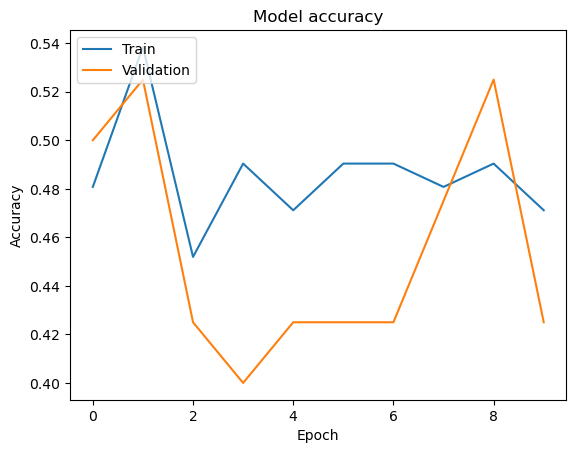

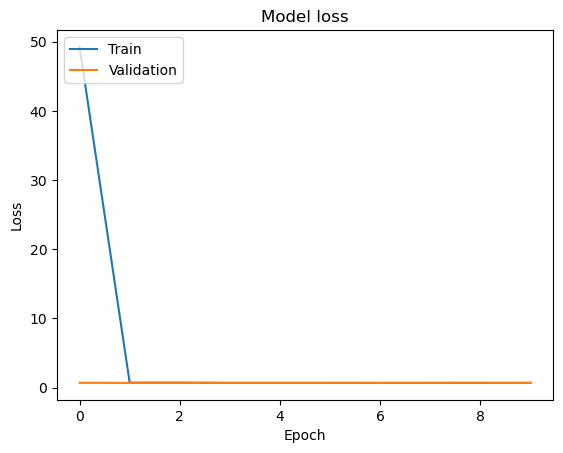

In [12]:
# Accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [13]:
from keras.applications.resnet50 import ResNet50
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [14]:
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model
from keras.optimizers import Adam

x = resnet_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  

model = Model(inputs=resnet_model.input, outputs=predictions)

In [15]:
# Freeze the layers of the pre-trained model
for layer in resnet_model.layers:
    layer.trainable = False

In [16]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [17]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.6628 - loss: 1.3493 - val_accuracy: 0.8250 - val_loss: 0.3708
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8418 - loss: 0.7497 - val_accuracy: 0.7750 - val_loss: 0.5015
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9382 - loss: 0.1975 - val_accuracy: 0.9250 - val_loss: 0.1709
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9324 - loss: 0.1866 - val_accuracy: 0.8000 - val_loss: 0.3803
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9342 - loss: 0.2188 - val_accuracy: 0.9250 - val_loss: 0.1582
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9577 - loss: 0.1605 - val_accuracy: 0.8500 - val_loss: 0.3290
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9779 - loss: 0.0923 - val_accuracy: 0.9000 - val_loss: 0.2183
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9742 - loss: 0.0871 - val_accuracy: 0.8250 - val_loss: 0.3909
Epoch 9/

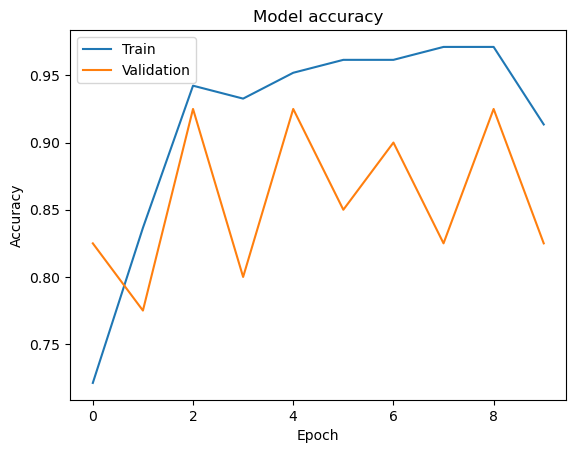

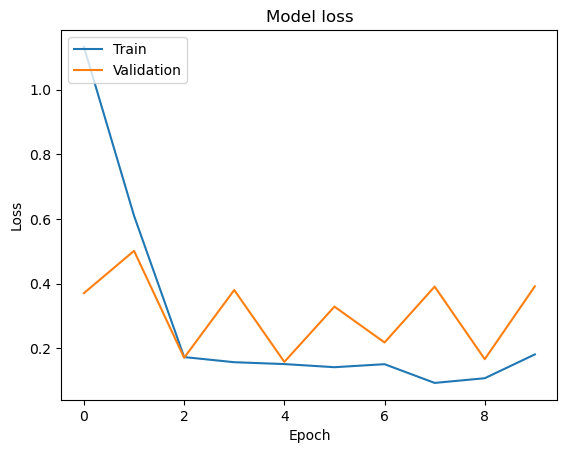

In [18]:
# Accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [19]:
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

In [20]:
import cv2
import matplotlib.pyplot as plt

# Function to preprocess the image
desired_width = 150
desired_height = 150
def preprocess_image(image_path):

    # Load the image using OpenCV
    image = cv2.imread(image_path)
    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Resize the image if needed
    # image_resized = cv2.resize(image_rgb,(desired_width, desired_height))
    # Preprocess further if required
    
    
    return image_rgb


In [21]:
def predict_with_model(preprocessed_img, model):

    # Predict the class
    predictions = model.predict(preprocessed_img)
    predicted_class = np.round(predictions[0]).astype(int)

    # Interpret the prediction
    if predicted_class == 0:
        return "The person is wearing glasses."
    else:
        return "The person is not wearing glasses."

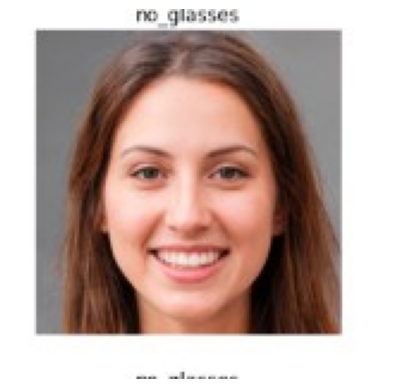

In [33]:

# Define the path to the image
image_path = 'C:\\Users\\d7o0o\\Desktop\\Saturn\\New folder (2)\\images\\test\\row-7-column-4.jpg'

# Preprocess the image
image_one = preprocess_image(image_path)

# Display the image using matplotlib
plt.imshow(image_one)
plt.axis('off')  # Turn off axis
plt.show()


In [34]:
def preprocess_and_predict(image_path, model):
    # Preprocess the image
    image_rgb = preprocess_image(image_path)

    # Resize the image
    desired_width, desired_height = 150, 150
    image_resized = cv2.resize(image_rgb, (desired_width, desired_height))

    # Add a batch dimension to the resized image
    image_resized_with_batch = np.expand_dims(image_resized, axis=0)

    # Call the predict_with_model function with the resized image and the model
    prediction_result = predict_with_model(image_resized_with_batch, model)

    return prediction_result

# Define the path to the image
image_path = 'C:\\Users\\d7o0o\\Desktop\\Saturn\\New folder (2)\\images\\test\\row-7-column-4.jpg'

# Call the preprocess_and_predict function
prediction_result = preprocess_and_predict(image_path, model)
print(prediction_result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
The person is not wearing glasses.
